In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree 
import matplotlib.pyplot as plt
from IPython.display import  clear_output

## import the file 

In [2]:
dia = pd.read_excel('diabetes_data.xlsx')

# find the correlation in order to drop columns that are not needed

In [3]:
# before now i took the file to excel, to remove the unwanted columns, so these are the columns we will be working with
dia.corr()

,Age,BMI,Glucose,BloodPressure,HbA1c,LDL,WaistCircumference,HipCircumference,WHR,FamilyHistory,Hypertension,MedicationUse,Outcome
Age,1.000000,0.021794,0.487808,0.429335,0.396354,-0.003871,0.025591,0.020944,0.009933,-0.012887,0.038417,0.852709,0.068453
BMI,0.021794,1.000000,0.556683,0.605405,0.459852,0.019921,0.761734,0.662458,0.252677,0.008037,0.073731,0.016819,0.107248
Glucose,0.487808,0.556683,1.000000,0.541987,0.817493,0.019576,0.428944,0.372786,0.142554,-0.005163,0.072806,0.415119,0.168325
BloodPressure,0.429335,0.605405,0.541987,1.000000,0.444980,0.000265,0.460178,0.400626,0.152305,0.001396,0.103512,0.369046,0.096361
HbA1c,0.396354,0.459852,0.817493,0.444980,1.000000,0.011975,0.352626,0.308792,0.114624,-0.007981,0.071363,0.339440,0.151506
LDL,-0.003871,0.019921,0.019576,0.000265,0.011975,1.000000,0.017321,0.018431,0.004223,0.018212,-0.002842,-0.001482,0.019497
WaistCircumference,0.025591,0.761734,0.428944,0.460178,0.352626,0.017321,1.000000,0.512328,0.644492,0.011753,0.036728,0.024709,0.087492
HipCircumference,0.020944,0.662458,0.372786,0.400626,0.308792,0.018431,0.512328,1.000000,-0.314888,0.020879,0.041223,0.020334,0.082797
WHR,0.009933,0.252677,0.142554,0.152305,0.114624,0.004223,0.644492,-0.314888,1.000000,-0.004180,0.004739,0.009986,0.021727
FamilyHistory,-0.012887,0.008037,-0.005163,0.001396,-0.007981,0.018212,0.011753,0.020879,-0.004180,1.000000,-0.000175,-0.007653,0.909166


In [4]:
## divide the dataset into inputs and target values

In [5]:
inputs = dia.drop('Outcome',axis= 'columns')
target = dia['Outcome']

In [6]:
## Bringing in our Decision tree model

In [7]:
tmodel = tree.DecisionTreeClassifier()

In [8]:
# fit the model on the training set
tmodel.fit(inputs,target)

DecisionTreeClassifier()

In [9]:
tmodel.score(inputs,target)

1.0

## creating a function to take inputs and use the algorithm to make a decision

In [13]:
def get_inputs(fields):
    # clear screen 
    clear_output(wait=True)    
    inputs=[] 
    for field in fields:
        value = float(input(f'enter the {field}: '))
        inputs.append(value)
    return inputs 

def pred(values):
    return tmodel.predict([values])
fields = ['Age',	'BMI',	'Glucose',	'BloodPressure',	'HbA1c',	'LDL',	'WaistCircumference',	
          'HipCircumference',	'WHR',	'FamilyHistory',	'Hypertension',	'MedicationUse' ]
inputs = get_inputs(fields)
ans = pred(inputs)
clear_output(wait=True)    

if ans == [1] :
    print(f'you have diabetes')

else: 
   print(f'you do not have diabetes')



you do not have diabetes


In [15]:
# 69	28.39	130.1	77	5.4	130.4	90.5	107.9	0.84	0	0	1	

[Text(0.6, 0.8333333333333334, 'x[9] <= 0.5\ngini = 0.45139\nsamples = 9538\nvalue = [6256, 3282]\nclass = diabetic'),
 Text(0.4, 0.5, 'x[2] <= 140.05\ngini = 0.11222\nsamples = 6653\nvalue = [6256, 397]\nclass = diabetic'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6256\nvalue = [6256, 0]\nclass = diabetic'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 397\nvalue = [0, 397]\nclass = non diabetic'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2885\nvalue = [0, 2885]\nclass = non diabetic')]

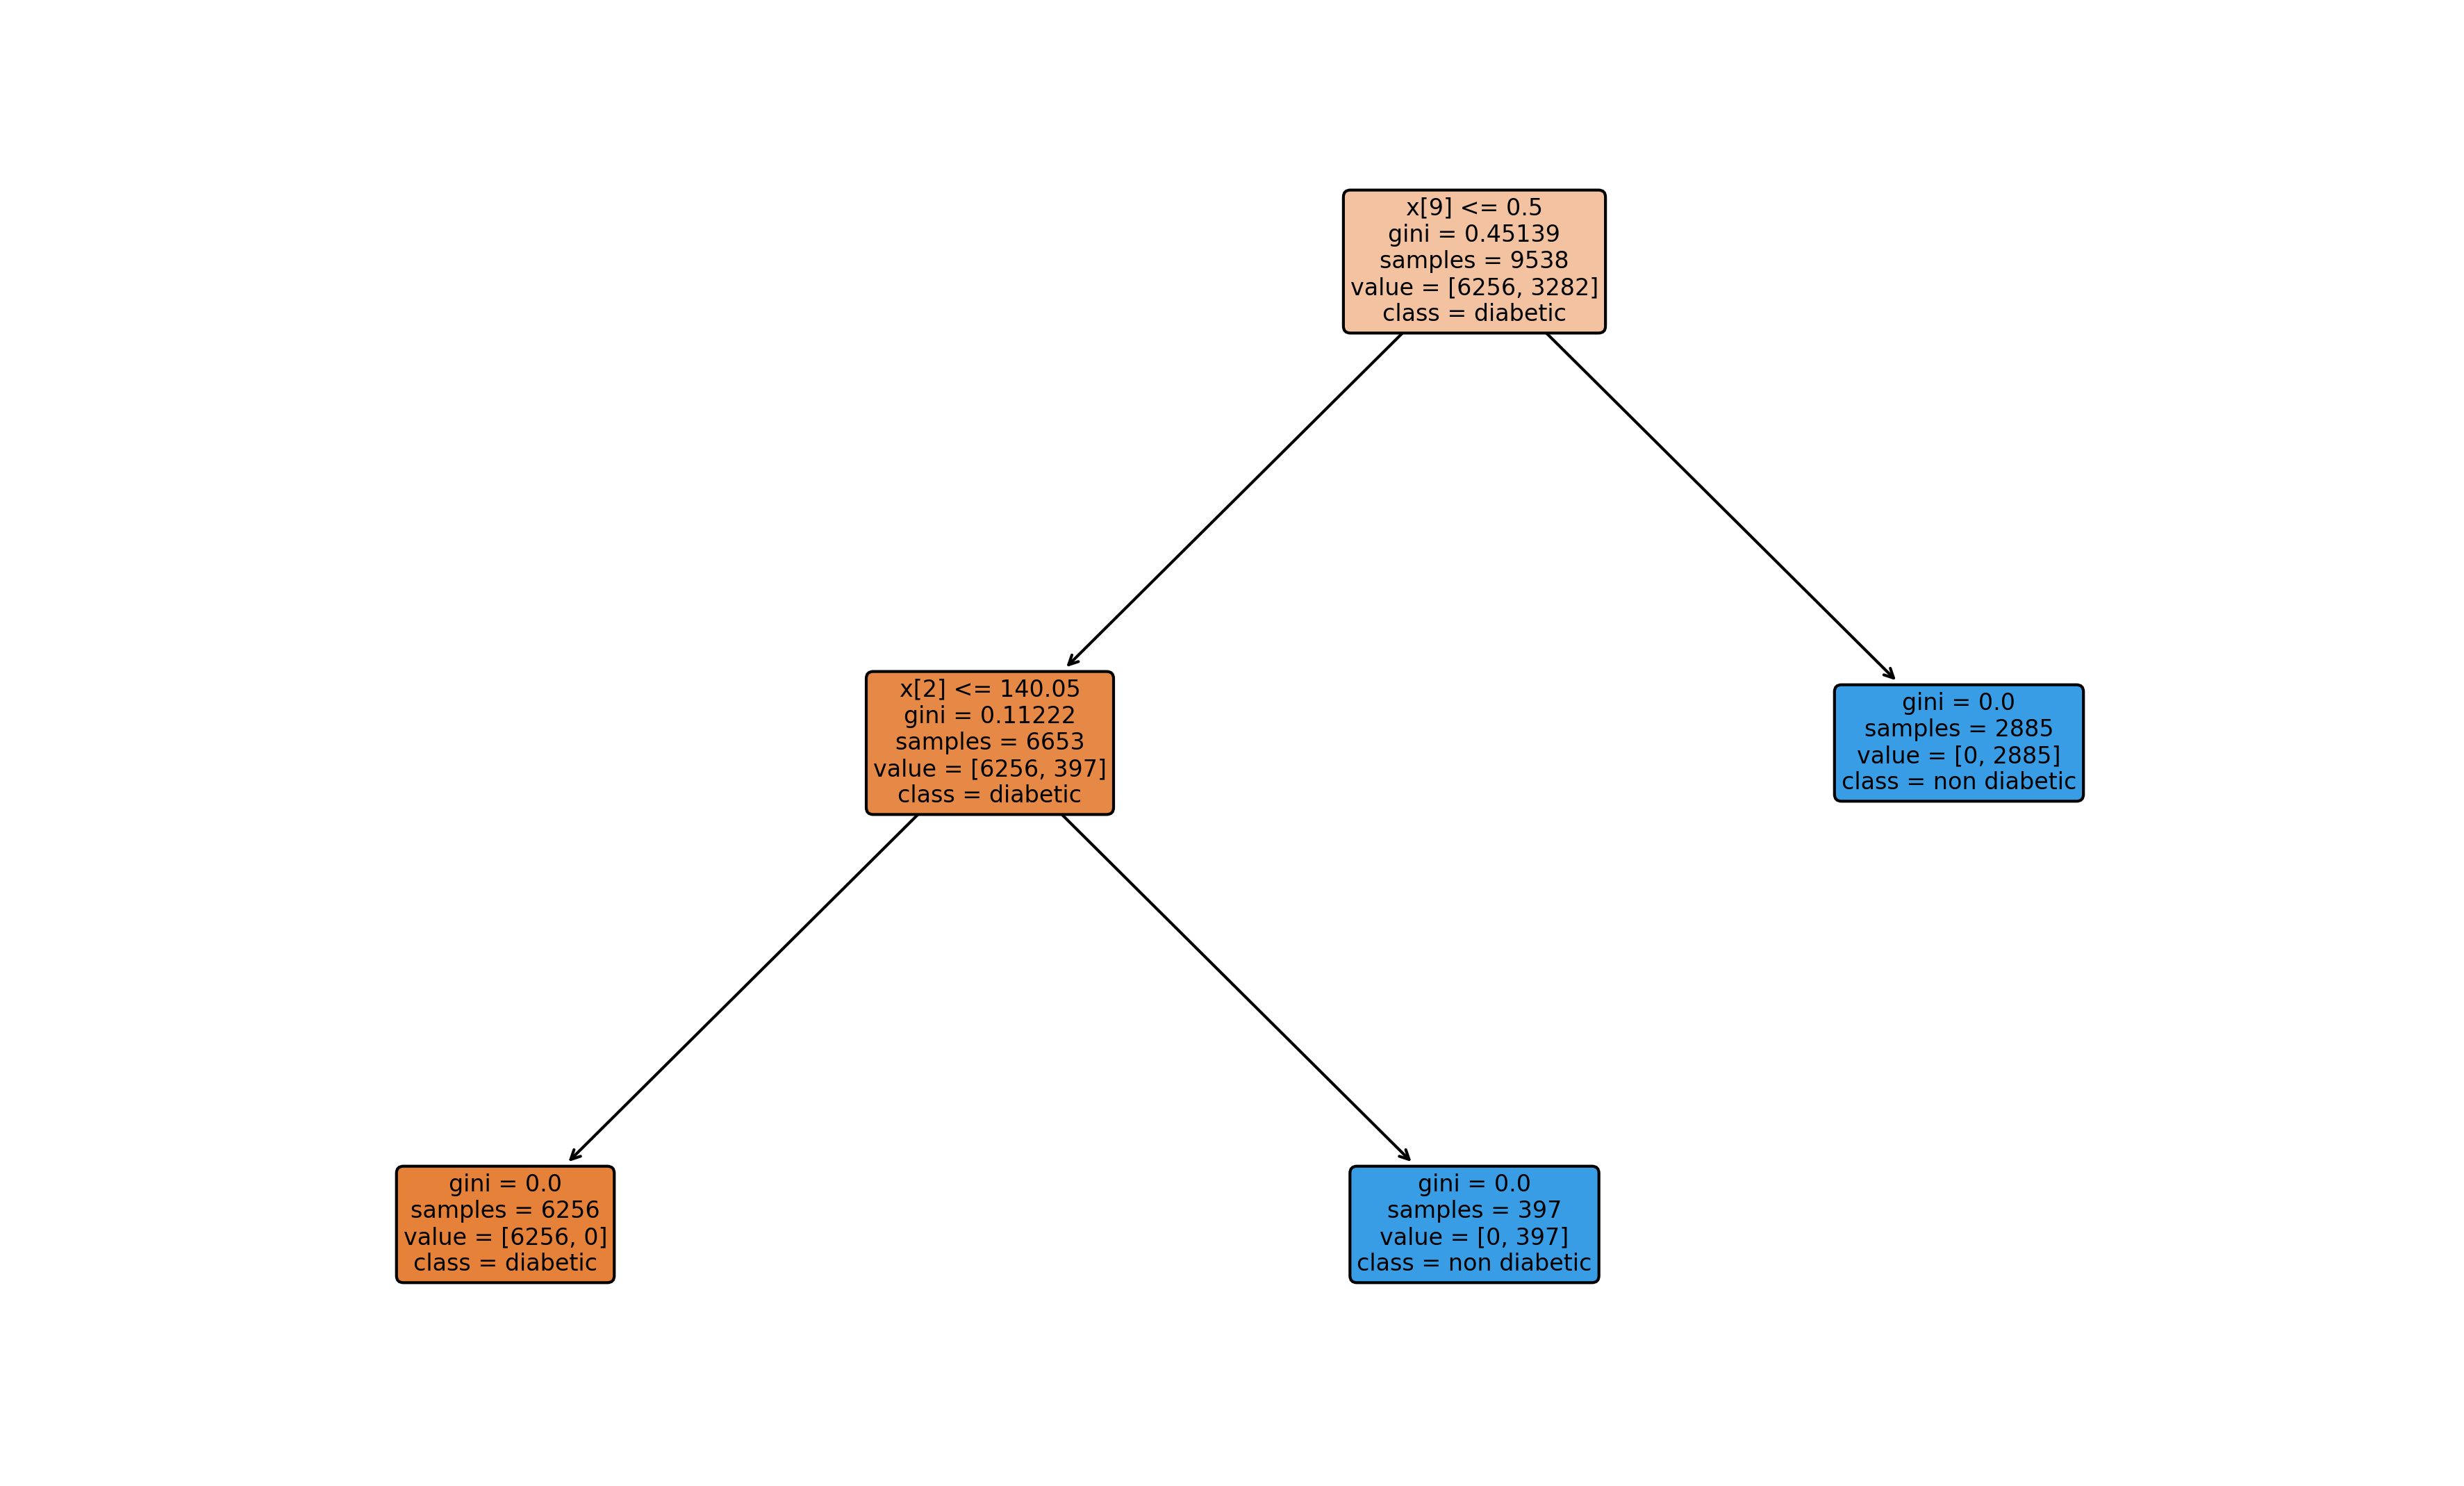

In [12]:
plt.figure(figsize=(15,9), dpi= 300)
tree.plot_tree(tmodel,filled=True,impurity=True,label='all',rounded=True,precision=5, fontsize=8,class_names=['diabetic','non diabetic'],max_depth = 5)
